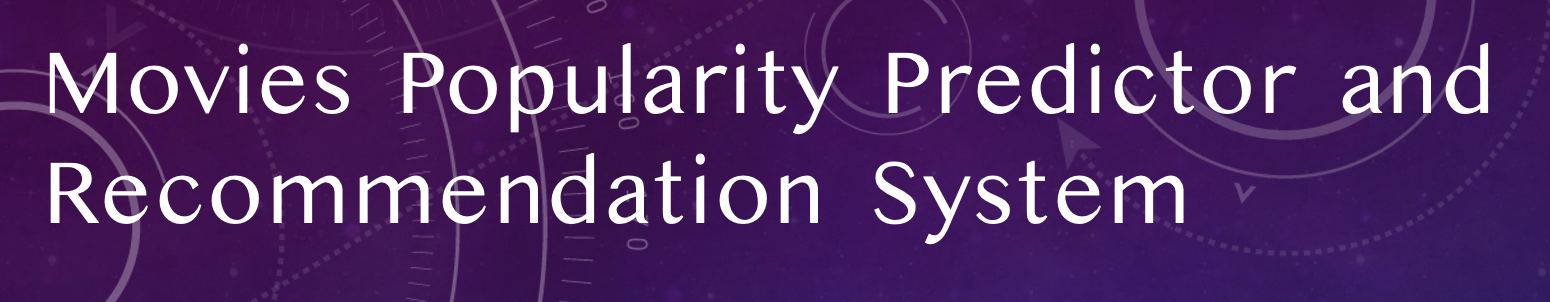

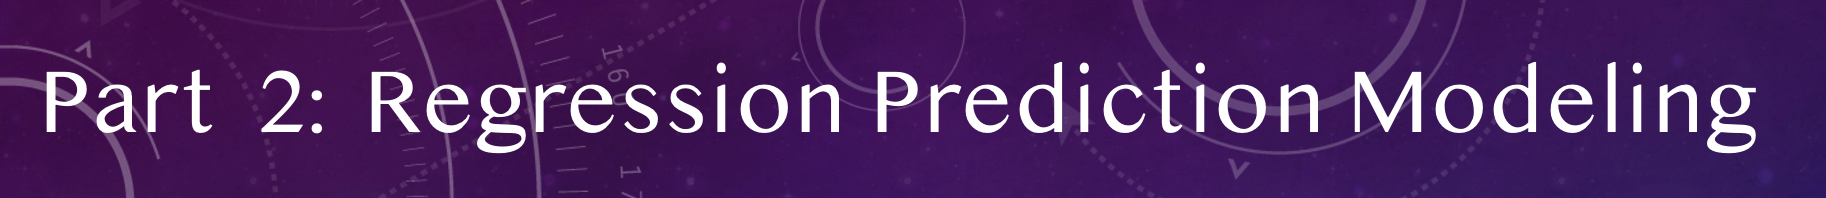

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Merge-the-data" data-toc-modified-id="Merge-the-data-0.1">Merge the data</a></span></li></ul></li><li><span><a href="#Regression" data-toc-modified-id="Regression-1">Regression</a></span></li><li><span><a href="#Selecting-best-features" data-toc-modified-id="Selecting-best-features-2">Selecting best features</a></span></li><li><span><a href="#ML" data-toc-modified-id="ML-3">ML</a></span></li></ul></div>

In [ ]:
pip install scikeras

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
# Plotly 

import plotly.graph_objects as go
# Sklearn
import seaborn as sns
import sklearn
from tqdm.notebook import tqdm
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
# Deep learning 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from scikeras.wrappers import KerasRegressor
from keras.models import load_model
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


### Getehring data: 

In this notebook, we have two data frames. One includes movie ID, title, cast, and crew, while the second has additional features like genres, budget, and original language. We will merge these data frames since they both contain useful information for predicting movie popularity. By combining the data, we can utilize a broader set of predictors to enhance the accuracy of our popularity predictions.

In [2]:
# Uploading and viewing the data
tmdb_5000_cred = pd.read_csv(r'D:\OneDrive - NITT\Custom_Download\tmdb_5000_credits.csv', index_col=False)
tmdb_5000_cred.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

In [3]:
# Uploading and viewing the data
tmdb_5000_cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [4]:
# Uploading and viewing the data
tmdb_5000_mov = pd.read_csv(r'D:\OneDrive - NITT\Custom_Download\tmdb_5000_movies.csv')
tmdb_5000_mov.head()

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   
4        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   
3  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16  1084939099   
4  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   284139100   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3    165.0           [{"iso_639_1": "en", "name": "English"}]  Released   
4    132.0           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466  
3                     The Dark Knight Rises           7.6        9106  
4                               John Carter           6.1        2124

In [5]:
# Checking the details of the data 
tmdb_5000_mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

#### Merging the data

In [6]:
# Merging the two data sets 
tmdb_5000_cred.columns = ['id','tittle','cast','crew']
tmdb_5000_mov = tmdb_5000_mov.merge(tmdb_5000_cred,on='id')

In [7]:
# View more details 
tmdb_5000_mov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [8]:
# Checking the shape 
tmdb_5000_mov.shape

(4803, 23)

In [9]:
# Display the first two rows of the dataset

tmdb_5000_mov[:2].T

0  \
budget                                                        237000000   
genres                [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
homepage                                    http://www.avatarmovie.com/   
id                                                                19995   
keywords              [{"id": 1463, "name": "culture clash"}, {"id":...   
original_language                                                    en   
original_title                                                   Avatar   
overview              In the 22nd century, a paraplegic Marine is di...   
popularity                                                   150.437577   
production_companies  [{"name": "Ingenious Film Partners", "id": 289...   
production_countries  [{"iso_3166_1": "US", "name": "United States o...   
release_date                                                 2009-12-10   
revenue                                                      2787965087   
runtime                                                           162.0   
spoken_languages      [{"iso_639_1": "en", "name": "English"}, {"iso...   
status                                                         Released   
tagline                                     Enter the World of Pandora.   
title                                                            Avatar   
vote_average                                                        7.2   
vote_count                                                        11800   
tittle                                                           Avatar   
cast                  [{"cast_id": 242, "character": "Jake Sully", "...   
crew                  [{"credit_id": "52fe48009251416c750aca23", "de...   

                                                                      1  
budget                                                        300000000  
genres                [{"id": 12, "name": "Adventure"}, {"id": 14, "...  
homepage                   http://disney.go.com/disneypictures/pirates/  
id                                                                  285  
keywords              [{"id": 270, "name": "ocean"}, {"id": 726, "na...  
original_language                                                    en  
original_title                 Pirates of the Caribbean: At World's End  
overview              Captain Barbossa, long believed to be dead, ha...  
popularity                                                   139.082615  
production_companies  [{"name": "Walt Disney Pictures", "id": 2}, {"...  
production_countries  [{"iso_3166_1": "US", "name": "United States o...  
release_date                                                 2007-05-19  
revenue                                                       961000000  
runtime                                                           169.0  
spoken_languages               [{"iso_639_1": "en", "name": "English"}]  
status                                                         Released  
tagline                  At the end of the world, the adventure begins.  
title                          Pirates of the Caribbean: At World's End  
vote_average                                                        6.9  
vote_count                                                         4500  
tittle                         Pirates of the Caribbean: At World's End  
cast                  [{"cast_id": 4, "character": "Captain Jack Spa...  
crew                  [{"credit_id": "52fe4232c3a36847f800b579", "de...

**Popularity** IMDbPro uses proprietary algorithms that take into account several measures of popularity for people, titles and companies. The primary measure is who and what people are looking at on IMDb. The rankings are updated on a weekly basis, typically by the end of Monday.

This line filters the dataset to exclude rows where  'revenue' = 0. Those rows represent movies that did not generate any revenue, and therefore do not provide relevant information for our analysis.

In [10]:

# Filtering data where revenue is not 0
tmdb_5000_mov[tmdb_5000_mov['revenue']!=0]

budget                                             genres  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...         ...                                                ...   
4775          0  [{"id": 18, "name": "Drama"}, {"id": 35, "name...   
4788      12000  [{"id": 27, "name": "Horror"}, {"id": 35, "nam...   
4792      20000  [{"id": 80, "name": "Crime"}, {"id": 27, "name...   
4796       7000  [{"id": 878, "name": "Science Fiction"}, {"id"...   
4798     220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   

                                          homepage      id  \
0                      http://www.avatarmovie.com/   19995   
1     http://disney.go.com/disneypictures/pirates/     285   
2      http://www.sonypictures.com/movies/spectre/  206647   
3               http://www.thedarkknightrises.com/   49026   
4             http://movies.disney.com/john-carter   49529   
...                                            ...     ...   
4775                                           NaN   33693   
4788                                           NaN     692   
4792                                           NaN   36095   
4796                    http://www.primermovie.com   14337   
4798                                           NaN    9367   

                                               keywords original_language  \
0     [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1     [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2     [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3     [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4     [{"id": 818, "name": "based on novel"}, {"id":...                en   
...                                                 ...               ...   
4775             [{"id": 171993, "name": "mumblecore"}]                en   
4788  [{"id": 237, "name": "gay"}, {"id": 900, "name...                en   
4792  [{"id": 233, "name": "japan"}, {"id": 549, "na...                ja   
4796  [{"id": 1448, "name": "distrust"}, {"id": 2101...                en   
4798  [{"id": 5616, "name": "united states\u2013mexi...                es   

                                original_title  \
0                                       Avatar   
1     Pirates of the Caribbean: At World's End   
2                                      Spectre   
3                        The Dark Knight Rises   
4                                  John Carter   
...                                        ...   
4775                               Funny Ha Ha   
4788                            Pink Flamingos   
4792                                       キュア   
4796                                    Primer   
4798                               El Mariachi   

                                               overview  popularity  \
0     In the 22nd century, a paraplegic Marine is di...  150.437577   
1     Captain Barbossa, long believed to be dead, ha...  139.082615   
2     A cryptic message from Bond’s past sends him o...  107.376788   
3     Following the death of District Attorney Harve...  112.312950   
4     John Carter is a war-weary, former military ca...   43.926995   
...                                                 ...         ...   
4775  Unsure of what to do next, 23-year-old Marnie ...    0.362633   
4788  Notorious Baltimore criminal and underground f...    4.553644   
4792  A wave of gruesome murders is sweeping Tokyo. ...    0.212443   
4796  Friends/fledgling entrepreneurs invent a devic...   23.307949   
4798  El Mariachi just wants to play his guitar and ...   14.269792   

                                   productio

In [11]:
# Checking shape  
tmdb_5000_mov.shape

(4803, 23)

### Preparing the data for modeling 

* Split the data into dependent and independent variables.
* Performed a train-test split on the data.
* Scale and encoding the data separately using a pipeline to avoid leakage.


In [12]:

# List the variables 
list(tmdb_5000_mov)

['budget',
 'genres',
 'homepage',
 'id',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'vote_average',
 'vote_count',
 'tittle',
 'cast',
 'crew']

In [13]:
# Create a copy for the data 
df = tmdb_5000_mov.copy()

In [14]:


# Selecting only the important variables that are relevant for our analysis.
imp_cols = ['budget', 'genres','popularity','original_language',
            'runtime','vote_average','vote_count','release_date']

In [15]:
# Creating a dataframe with all the important columns  
df = df[imp_cols]

In [16]:
# Vewing dataframe
df

budget                                             genres  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...         ...                                                ...   
4798     220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4799       9000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4800          0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4801          0                                                 []   
4802          0                [{"id": 99, "name": "Documentary"}]   

      popularity original_language  runtime  vote_average  vote_count  \
0     150.437577                en    162.0           7.2       11800   
1     139.082615                en    169.0           6.9        4500   
2     107.376788                en    148.0           6.3        4466   
3     112.312950                en    165.0           7.6        9106   
4      43.926995                en    132.0           6.1        2124   
...          ...               ...      ...           ...         ...   
4798   14.269792                es     81.0           6.6         238   
4799    0.642552                en     85.0           5.9           5   
4800    1.444476                en    120.0           7.0           6   
4801    0.857008                en     98.0           5.7           7   
4802    1.929883                en     90.0           6.3          16   

     release_date  
0      2009-12-10  
1      2007-05-19  
2      2015-10-26  
3      2012-07-16  
4      2012-03-07  
...           ...  
4798   1992-09-04  
4799   2011-12-26  
4800   2013-10-13  
4801   2012-05-03  
4802   2005-08-05  

[4803 rows x 8 columns]

In [17]:
# Converting release_date to datetime 
df['release_date'] = pd.to_datetime(df['release_date'], 
                                               errors='coerce')

# Extracting the month from the release_date column
df['release_date_month'] = df['release_date'].dt.month

In [18]:
# Dropping release date since we wont need it any more
df.drop('release_date',axis=1,inplace=True)

In [19]:
# Dropping null values
df.dropna(inplace=True)

In [20]:
#  Changing the data type to integer 
df['release_date_month'] = df['release_date_month'].astype('int')

In [21]:
#  Changing the data type to object 

df['release_date_month'] = df['release_date_month'].astype('object')

We will be working with two types of data: numerical and categorical. We need to separate these data types for conducting scaling. Numerical data will be scaled or normalized, while categorical data will undergo specific encoding techniques

In [22]:
# Storing numerical columns 
numeric_cols = ['budget','runtime','vote_average','vote_count']

In [23]:
# View numerical columns 
numeric_cols

['budget', 'runtime', 'vote_average', 'vote_count']

In [24]:
# # Converting to a list of dictionaries
df['genres'] = df['genres'].apply(lambda x: eval(x))

In [25]:
# Checking the data  
df.head()

budget                                             genres  popularity  \
0  237000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...  150.437577   
1  300000000  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...  139.082615   
2  245000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...  107.376788   
3  250000000  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...  112.312950   
4  260000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   43.926995   

  original_language  runtime  vote_average  vote_count release_date_month  
0                en    162.0           7.2       11800                 12  
1                en    169.0           6.9        4500                  5  
2                en    148.0           6.3        4466                 10  
3                en    165.0           7.6        9106                  7  
4                en    132.0           6.1        2124                  3

In [26]:
# Dropping null values
df.dropna(inplace=True)

In [27]:
# Running the function 
def get_val(dictionary_list):
    val = [d['name'] for d in dictionary_list]
    return val

# Running a lmabda function for the genres column 
from tqdm.notebook import tqdm
tqdm.pandas()

# Apply the get_val function to extract the genre namesn

df['genres'] = df['genres'].progress_apply(get_val)

  0%|          | 0/4800 [00:00<?, ?it/s]

In [28]:
# Viewing df
df.head()

budget                                         genres  popularity  \
0  237000000  [Action, Adventure, Fantasy, Science Fiction]  150.437577   
1  300000000                   [Adventure, Fantasy, Action]  139.082615   
2  245000000                     [Action, Adventure, Crime]  107.376788   
3  250000000               [Action, Crime, Drama, Thriller]  112.312950   
4  260000000           [Action, Adventure, Science Fiction]   43.926995   

  original_language  runtime  vote_average  vote_count release_date_month  
0                en    162.0           7.2       11800                 12  
1                en    169.0           6.9        4500                  5  
2                en    148.0           6.3        4466                 10  
3                en    165.0           7.6        9106                  7  
4                en    132.0           6.1        2124                  3

In [29]:
# Splitting the data into Independent and Dependent Variables
X = df.drop('popularity',axis=1)
y = df['popularity']

In [30]:
# Splitting the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                            test_size=0.20, random_state=42)



In [31]:
# Viewing Training data
X_train

budget                                      genres original_language  \
2759  13000000                           [Comedy, Romance]                en   
2851  12000000  [Comedy, Family, Fantasy, Science Fiction]                en   
4442         0                                    [Comedy]                en   
4579    400000                [Adventure, Comedy, Fantasy]                en   
1774  25000000                             [Comedy, Drama]                en   
...        ...                                         ...               ...   
4428    950000                          [Horror, Thriller]                en   
466   80000000        [Science Fiction, Adventure, Action]                en   
3093         0                    [Crime, Drama, Thriller]                en   
3773         0                             [Comedy, Drama]                en   
860   55000000                            [Drama, Romance]                en   

      runtime  vote_average  vote_count release_date_month  
2759     84.0           5.5          10                  5  
2851     86.0           5.4          33                 10  
4442     88.0           6.5          15                  4  
4579     91.0           7.8        1708                  3  
1774    104.0           5.2         127                 10  
...       ...           ...         ...                ...  
4428     87.0           5.7          92                  8  
466      96.0           5.8         631                  3  
3093    104.0           6.8          37                  5  
3773     96.0           6.1          67                  1  
860     119.0           6.9         573                 11  

[3840 rows x 7 columns]

# Steps for custom transformer function

* Defining PassthroughTransformer class with BaseEstimator.
* Implementing  fit method to set columns and return self.
* Transforming to create a copy of X, named X_.
* Getting unique genres from 'genres' column.
* Iterating over each genre, creating a binary column.
* Dropping original 'genres' column.
* Returnning modified X_ DataFrame.

* Returning column names stored in cols.




In [32]:
# Storing genres 
passthrough_features = ['genres']

# Creating a custom transformer class for passthrough features

class PassthroughTransformer(BaseEstimator):
    def fit(self, X, y = None):
        self.cols = X.columns
        return self
        
    def transform(self, X, y = None):
        
        #Creating a copy
        X_ = X.copy()

        # Getting all unique genres from the 'genres' column
        self.all_genre = set(sum(df['genres'],[]))


        # Iterating over each genre and create a new binary column for it
        for gen in tqdm(self.all_genre):
            X_[gen] = X_['genres'].apply(lambda x: 1 if gen in x else 0)

        # Dropping the original 'genres' column   
        X_.drop('genres',axis=1,inplace=True)
        return X_

    def get_feature_names(self):
        return list(self.all_genre)

# enc = ColumnTransformer([('pass' , PassthroughTransformer(), passthrough_features)])

In [33]:
set(sum(df['genres'],[]))

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

#### Pipeline

We use the OneHotEncoder to handle categorical features, the StandardScaler to scale numeric features, and the ColumnTransformer to combine these preprocessing steps.

In [34]:
# Create an instance of the OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')

# Storing one hot encoder in a pipeline
categorical_processing = Pipeline(steps=[('ohe', ohe)])
scaling_processing = Pipeline(steps=[('scale', StandardScaler())])

# we need to bring together the preprocessing steps for both cat. and num.
# We create a ColumnTransformer object fort preprocessing steps for diff. columns.
# We apply the categorical_processing step to the 'original_language' and 
# 'release_date_month' columns,
# and the scaling_processing step to the numeric columns.

preprocessing = ColumnTransformer(transformers=[
                ('categorical', categorical_processing, ['original_language',
                                                         'release_date_month']),
        ('numeric', scaling_processing, numeric_cols),
         ('pass' , PassthroughTransformer(), passthrough_features)
                                               ],
                                  )

In [35]:
# Checking shape for the training data 
X_train.shape

(3840, 7)

In [36]:
# Checking shape for the testing data 
X_test.shape

(960, 7)

By applying fit_transform on the training data and transform on the test data, we make sure that the data is processes for both and we avoid any leakage of information from the test data into the training process.

In [37]:
# # Scale and hot encode the train and test data
X_train = preprocessing.fit_transform(X_train)

X_test = preprocessing.transform(X_test)

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

In [38]:
genre_label = preprocessing.named_transformers_['pass'].get_feature_names()
enc_cat_features = preprocessing.named_transformers_['categorical']['ohe'].get_feature_names()
other_col = ['runtime','vote_average','vote_count','budget']
labels = np.concatenate([genre_label, enc_cat_features,other_col])
# X_train = pd.DataFrame(preprocessing.transform(X_train), columns=labels)
# X_test = pd.DataFrame(preprocessing.transform(X_test), columns=labels)

In [39]:
X_train = pd.DataFrame(X_train,columns=labels)
X_test = pd.DataFrame(X_test,columns=labels)

In [40]:
# X_train = X_train.toarray()
# X_test = X_test.toarray()

Steps for Regression Modeling Approach:

* We will start with a baseline model using ordinary least squares (OLS) regression

* We will select the best features based on their significance

* Then we will implement three machine learning models: Random Forest, XGBoost, and AdaBoost

* We will follow by training  a general MLP (Multi-Layer Perceptron) model 

* Ultimately, we will evaluate the performance of each model and compare their results

### Regression

In [41]:
# Checking shape 
print('Test data shape:', X_test.shape,'Train data shape:', X_train.shape)

Test data shape: (960, 70) Train data shape: (3840, 70)


In [42]:
# Resetting index 
y_train.reset_index(drop=True,inplace=True)

In [43]:
# Running the OLS regression model. 
X_train # Using the best features for the model
X_train_int = sm.add_constant(X_train)  # Adding a constant 
model_3 = sm.OLS(y_train, X_train).fit() # Fitting the training data
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     91.40
Date:                Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                        23:00:11   Log-Likelihood:                -16772.
No. Observations:                3840   AIC:                         3.368e+04
Df Residuals:                    3771   BIC:                         3.411e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Documentary         1.1370     18.962      0.060      0.952     -36.039      38.313
Horror              4.3991     13.534      0.325      0.745     -22.136      30.934
History             6.6247      6.279      1.055      0.291      -5.685      18.935
Animation           1.3894     18.953      0.073      0.942     -35.770      38.549
Western             8.5111      8.643      0.985      0.325      -8.433      25.456
TV Movie            4.3949      4.796      0.916      0.360      -5.008      13.798
Music              20.9574     18.950      1.106      0.269     -16.197      58.112
Mystery             6.9959      1.796      3.895      0.000       3.475      10.517
Romance             6.2482      4.173      1.497      0.134      -1.933      14.429
Comedy              3.8640      9.640      0.401      0.689     -15.037      22.765
Science Fiction     5.3736      2.996      1.794      0.073      -0.500      11.248
Crime              -0.0524     11.075     -0.005      0.996     -21.766      21.662
Drama               3.7886      5.428      0.698      0.485      -6.853      14.430
Fantasy             0.5288     19.045      0.028      0.978     -36.811      37.869
Foreign             7.6690     19.050      0.403      0.687     -29.680      45.018
Adventure           0.9490     18.963      0.050      0.960     -36.229      38.127
Action             11.3737      6.583      1.728      0.084      -1.533      24.280
Family              7.2772      5.595      1.301      0.193      -3.692      18.247
War                 6.9434      6.574      1.056      0.291      -5.945      19.832
Thriller            7.6976     19.068      0.404      0.686     -29.687      45.082
x0_af               0.7153     18.992      0.038      0.970     -36.519      37.950
x0_ar               3.0801      9.676      0.318      0.750     -15.890      22.051
x0_cn               4.4376     18.977      0.234      0.815     -32.770      41.645
x0_cs               4.5487      6.906      0.659      0.510      -8.991      18.089
x0_da               5.8783     13.474      0.436      0.663     -20.540      32.296
x0_de               2.7660      6.575      0.421      0.674     -10.125      15.657
x0_el               1.1918     18.953      0.063      0.950     -35.967      38.350
x0_en               4.8410      8.631      0.561      0.575     -12.080      21.762
x0_es              -0.0264     13.499     -0.002      0.998     -26.492      26.440
x0_fa               7.3173     19.075      0.384      0.701     -30.082      44.716
x0_fr               4.8566     11.118      0.437      0.662     -16.941      26.654
x0_he               1.3834     18.992      0.073      0.942     -35.852      38.619
x0_hi               1.7671     18.971      0.093      0.926     -35.426      38.961
x0_hu               4.7556      4.722      1.007      0.314

### Selecting best features 

The SelectKBest model evaluates the statistical significance of each feature's relationship with the target variable using F-value.
Based on the scores, SelectKBest selects the top k features with the highest scores, which are the features that are most relevant for predicting the target variable.


In [44]:
# Selecting the best features for training using SelectKBest
# Selecting the top 5 features
selector = SelectKBest(score_func=f_regression, k=5) # Selecing using select k best   
ch = selector.fit(X_train, y_train) # Fitting
X_train_selectk = ch.transform(X_train) # Transforming

In [45]:
 # fit and transform using selector
# X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature indices
# selected_features = selector.get_support(indices=True)
# Print the selected feature names
# col_sel = X_train.columns[selected_features]
# col_sel = list(col_sel)
# col_sel

In [46]:
# X_train.columns[selected_features]

In [47]:
# Selecting for test as well 
X_test_selectk = selector.transform(X_test)

In [48]:
# Checking training data
X_train_selectk.shape

(3840, 5)

In [49]:
# Checking testing data
X_test_selectk.shape

(960, 5)

In [50]:
# See the scaling of X_train

# Resetting index 

# y_train.reset_index(drop=True,inplace=True)

# Adding a constant column to the selected features

# X_train_selectk = X_train.copy()

X_train_int = sm.add_constant(X_train_selectk)

# Creating the OLS model
model = sm.OLS(y_train, X_train_int)

# Fitting the model
OLS_SF = model.fit()

# Printing the summary
OLS_SF.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     1238.
Date:                Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                        23:02:18   Log-Likelihood:                -16796.
No. Observations:                3840   AIC:                         3.360e+04
Df Residuals:                    3834   BIC:                         3.364e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.8541      0.343     60.711      0.000      20.181      21.528
x1             1.6855      0.413      4.082      0.000       0.876       2.495
x2            -0.2952      0.345     -0.856      0.392      -0.971       0.381
x3             1.1727      0.348      3.366      0.001       0.490       1.856
x4            22.7945      0.404     56.394      0.000      22.002      23.587
x5             2.6530      0.919      2.887      0.004       0.851       4.455
==============================================================================
Omnibus:                     8472.133   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         85043533.707
Skew:                          19.661   Prob(JB):                         0.00
Kurtosis:                     730.994   Cond. No.                         4.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We build a function to calculate and return the mean squared error (MSE) and root mean squared error (RMSE) score. It also adds the results to a pandas dataframe for later use. includes a conditional if the model is from statsmodels - it addes a constant.





In [51]:
# X_train_selectk = pd.DataFrame(X_train_selectk,columns=col_sel)

In [52]:
# Plot y_test vs. y_pred
# Function to calculate RMSE and MSE 

# Creating an empty dataframe
results_df_ml = pd.DataFrame([],columns=['Model','MSE','RMSE'])
# Initialize an empty string for the name of the model
mname = ''

# Function 
def  get_results(reg,x_test):
    mname = ''
    # If the reg model is from statmodels
    if 'statsmodels' in str(type(reg)):
        x_test = sm.add_constant(x_test)
        star = '*'
        mname = 'OLS - SelectK'
        
    # Getting predicted values 
    y_pred = reg.predict(x_test)
    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)

    # Calculate root mean squared error
    rmse = mean_squared_error(y_test, y_pred,squared=False)

    print('mse',mse)
    print('rmse',rmse)

    # Obtaining the name for the reg model
    if not mname:
        mname = type(reg).__name__

    # Store the results in the DataFrame
    results_df_ml.loc[len(results_df_ml)] = [mname,mse,rmse]
    return results_df_ml 


In [53]:
# Checking shape
X_test_selectk.shape

(960, 5)

In [54]:
# Run the function 

# X_test_selectk = X_test.copy()
get_results(OLS_SF, X_test_selectk)

# https://datascience.stackexchange.com/questions/26555/valueerror-shapes-1-10-and-2-not-aligned-10-dim-1-2-dim-0
# https://stackoverflow.com/questions/54003129/valueerror-shapes-993-228-and-1-228-not-aligned-228-dim-1-1-dim-0

mse 497.70243416654597
rmse 22.309245486267482


Model         MSE       RMSE
0  OLS - SelectK  497.702434  22.309245

### Machine Learning Models

*Random Forest*
Random Forest is an algorithm that combines multiple decision trees to make predictions.

It hands complex datasets. Random Forest aggregates the predictions of multiple trees, and that way it reduces overfitting and improves prediction accuracy.

In [55]:
# Reference

# https://www.google.com/search?q=mse+vs+rmse+sklearn&oq=&aqs=chrome.1.69i57j69i59j0i433i650j46i131i199i433i465i512l2j0i131i433i512j0i433i650j0i433i512j0i131i433i512j0i433i512.182474j0j4&sourceid=chrome&ie=UTF-8#ip=1

In [56]:
# View restuls 
results_df_ml

Model         MSE       RMSE
0  OLS - SelectK  497.702434  22.309245

In [57]:
def run_regression_models(X_train, y_train, X_test, y_test):
    # Initialize the models
    models = {
        'Random Forest': RandomForestRegressor(),
        'XGBoost': XGBRegressor(),
        'AdaBoost': AdaBoostRegressor()
    
    }

    # Initialize the DataFrame to store results
    # Results_df_ml = pd.DataFrame(columns=['Model', 'MSE', 'RMSE'])

    # Loop through each model
    for model_name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate MSE and RMSE
        mse = mean_squared_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)

#         results_df_ml
        # Add results to the DataFrame
    
        results_df_ml.loc[len(results_df_ml)] = [model_name,mse,rmse]
#         results_df_ml = results_df_ml.append({
#             'Model': model_name,
#             'MSE': mse,
#             'RMSE': rmse
#         }, ignore_index=True)

    return results_df_ml

**Machine learning function** 

Initializing the models (Random Forest, XGBoost, and AdaBoost) 
* Creating an empty DataFrame to store the results.
* Iterating through each model and performs the following:
   1. Fitting the model using the training data.
   2. Obtaining predictions on the test data.
   3. Calculating the (MSE) and (RMSE) between the predicted and actual values.
   4. Adding the model name, MSE, and RMSE to the results DataFrame.
* Returning the results DataFrame containing the model names, MSE, and RMSE for each model.

In [58]:
# Viewing resutls of the ML models
results_df_ml = run_regression_models(X_train, y_train, X_test, y_test)
results_df_ml

Model          MSE       RMSE
0  OLS - SelectK   497.702434  22.309245
1  Random Forest   595.856751  24.410177
2        XGBoost  1008.543747  31.757578
3       AdaBoost   721.741226  26.865242

# Getting the optimal model

In [59]:
# Sorting values
results_df_ml.sort_values('RMSE',inplace=True)
# Top model
optimal_model = results_df_ml['Model'][0]
print(optimal_model)

OLS - SelectK


In [60]:
# Random Forest
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)
y_pred = reg_rf.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

24.171392625344588

# Save/Load the Model

In [61]:
from joblib import Parallel, delayed
import joblib

# Save the model as a pickle in a file
joblib.dump(reg_rf, 'reg_rf.pkl') 

joblib.dump(preprocessing, 'preprocessing.pkl')

# Load the model from the file
rf_from_joblib = joblib.load('reg_rf.pkl')

cleaner_from_joblib = joblib.load('preprocessing.pkl')

# Use the loaded model to make predictions
y_pred_rf = rf_from_joblib.predict(X_test)

In [62]:
df.head(1)

budget                                         genres  popularity  \
0  237000000  [Action, Adventure, Fantasy, Science Fiction]  150.437577   

  original_language  runtime  vote_average  vote_count release_date_month  
0                en    162.0           7.2       11800                 12

In [63]:
X_new = [237000,['Action', 'Adventure'],'en','162.0','7.2','11800','12']

In [64]:
df_new = pd.DataFrame(X_new).T

In [65]:
df_new.columns = ['budget',
 'genres',
 'original_language',
 'runtime',
 'vote_average',
 'vote_count',
 'release_date_month']

In [66]:
df_new

budget               genres original_language runtime vote_average  \
0  237000  [Action, Adventure]                en   162.0          7.2   

  vote_count release_date_month  
0      11800                 12

In [67]:
df_new = cleaner_from_joblib.transform(df_new)

  0%|          | 0/20 [00:00<?, ?it/s]

In [68]:
y_pred_rf = rf_from_joblib.predict(df_new)

In [69]:
y_pred_rf[0]

282.37963897000003

* The Random Forest model has the lowest RMSE value of 23.98. It has the best performance among the three models. 



### Multilayer Perceptron MLP

MLP is a type of neural network that consists of 3 or more layers of  neurons. MLP, short for MLP, is a type of neural network that is composed of multiple layers of nodes, with each node being a simple computational unit that performs a mathematical operation. The MLP takes input data, processes it through the layers of nodes, and produces output predictions.

During training, the weights  between nodes are adjusted through a process called backpropagation. The weights  are updated to minimize the difference between the predicted outputs and the actual outputs.

In [70]:
# Setting the input shape
input_shape = (X_train.shape[1],)
print(f'Feature shape: {input_shape}')

Feature shape: (70,)


In [71]:
# Initializing callback
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='mean_squared_error',
                            min_delta=1e-4,
                            patience=5)]

In [72]:
# Create the model
mlp_model = Sequential()
mlp_model.add(Dense(16, input_shape=input_shape, activation='relu'))
mlp_model.add(Dense(8, activation='relu'))
mlp_model.add(Dense(1, activation='linear'))

# Configure the model and start training
mlp_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
mlp_model.fit(X_train[:100], y_train[:100], epochs=5, batch_size=32, 
          verbose=1, validation_split=0.2,callbacks=callbacks)

Epoch 1/5
3/3 [==============================] - 1s 123ms/step - loss: 614.3694 - mean_squared_error: 614.3694 - val_loss: 578.1370 - val_mean_squared_error: 578.1370 - lr: 0.0010
Epoch 2/5
3/3 [==============================] - 0s 15ms/step - loss: 613.6545 - mean_squared_error: 613.6545 - val_loss: 577.7264 - val_mean_squared_error: 577.7264 - lr: 0.0010
Epoch 3/5
3/3 [==============================] - 0s 15ms/step - loss: 613.0804 - mean_squared_error: 613.0804 - val_loss: 577.3116 - val_mean_squared_error: 577.3116 - lr: 0.0010
Epoch 4/5
3/3 [==============================] - 0s 15ms/step - loss: 612.5192 - mean_squared_error: 612.5192 - val_loss: 576.9054 - val_mean_squared_error: 576.9054 - lr: 0.0010
Epoch 5/5
3/3 [==============================] - 0s 14ms/step - loss: 611.9794 - mean_squared_error: 611.9794 - val_loss: 576.5179 - val_mean_squared_error: 576.5179 - lr: 0.0010


In [73]:
# True vs predicted
out = pd.DataFrame({
    'y_true':y_test[:10],
    'y_pred':mlp_model.predict(X_test[:10]).ravel()
}
).T


out

1/1 [==============================] - 0s 99ms/step


596       3371      3049      2909       8          577   \
y_true  13.267631  2.881239  5.842299  4.759190  98.885637  42.957216   
y_pred  -0.000161  0.317111  0.145657  0.227948  -0.148136  -0.008753   

            2868       811       3510       1538  
y_true  8.708229  29.972240  2.135689  32.217425  
y_pred  0.126764   0.056962  0.177523   0.040537

In [74]:
# Training the model
# from sklearn.preprocessing import OneHotEncoder

# onehot_encoder = OneHotEncoder()
# y_train_encoded = onehot_encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
# model.fit(X_train, y_train_encoded, epochs=3, batch_size=32, verbose=1)


In [75]:
# Making predictions on the test set
y_pred_mlp = mlp_model.predict(X_test)

30/30 [==============================] - 0s 1ms/step


In [76]:
# Calculating mean squared error
mlp_mse = mean_squared_error(y_test, y_pred_mlp)
print('Mean Squared Error:', mlp_mse)

Mean Squared Error: 1704.9005946443306


In [77]:
# Seeing the shape
X_train.shape

(3840, 70)

In [78]:
# Calculating root mean squared error
mlp_rmse = mean_squared_error(y_test, y_pred_mlp,squared=False)
print('Root Mean Squared Error:', round(mlp_rmse,3))

Root Mean Squared Error: 41.29


In [79]:
# Adding results for mlp model
mlp_results = {'Model': 'MLP', 'MSE': mlp_mse, 'RMSE': mlp_rmse}
results_df_ml = results_df_ml.append(mlp_results, ignore_index=True)
results_df_ml

Model          MSE       RMSE
0  OLS - SelectK   497.702434  22.309245
1  Random Forest   595.856751  24.410177
2       AdaBoost   721.741226  26.865242
3        XGBoost  1008.543747  31.757578
4            MLP  1704.900595  41.290442

In [80]:
# Sorting by RMSE in descending order
results_df_ml_sorted = results_df_ml.sort_values(by='RMSE', 
                                                 ascending=False)

# Creating a bar plot with RMSE values in descending order
fig = go.Figure(data=go.Bar(x=results_df_ml_sorted['Model'],
                            y=results_df_ml_sorted['RMSE'], 
                            marker_color='lightskyblue'))

# Find the index of the lowest RMSE value
lowest_rmse_index = results_df_ml_sorted['RMSE'].idxmin()

# Add a marker for the lowest RMSE value
fig.add_trace(go.Scatter(x=[results_df_ml_sorted['Model'][lowest_rmse_index]], y=[results_df_ml_sorted['RMSE'][lowest_rmse_index]],
                         mode='markers', marker=dict(color='red', size=10), name='Lowest RMSE'))

# Customize the layout
fig.update_layout(title='RMSE Comparison',
                  xaxis_title='Model',
                  yaxis_title='RMSE',
                  showlegend=True)

# Show the plot
fig.show()


Among the best-performing models were MLP and Random Forest. We will now perform hyperparameter tuning on these models to see if we can improve their results further.

### Hypertune Random Forest

In [81]:
# Seeing result
results_df_ml

Model          MSE       RMSE
0  OLS - SelectK   497.702434  22.309245
1  Random Forest   595.856751  24.410177
2       AdaBoost   721.741226  26.865242
3        XGBoost  1008.543747  31.757578
4            MLP  1704.900595  41.290442

In [82]:
# https://www.kaggle.com/code/sociopath00/random-forest-using-gridsearchcv
# Setting up parameters
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4],
}

In [83]:
# Creating the Random Forest regressor
rf = RandomForestRegressor(n_jobs=-1) # 

In [84]:
# Performing randomized search with progress bar
gird_search_rf = GridSearchCV(estimator=rf, 
                                      param_grid=parameters,
                                      verbose=1,n_jobs=-1,
                                      cv=3)

In [86]:
# Fitting grid search
rf_model = gird_search_rf.fit(X_train[:100], y_train[:100])
# pbar.update(1)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [87]:
# Getting best estimator
grid_rf = rf_model.best_estimator_

In [88]:
# Fitting grid
grid_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_jobs=-1)

In [89]:
# Predicting 
y_pred = grid_rf.predict(X_test)

In [90]:
# Get the best hyperparameters and model
# best_params_rf = random_search_rf.best_params_
# best_model_rf = random_search_rf.best_estimator_

In [91]:
# Calculating RMSE 
tuned_rf_rmse = mean_squared_error(y_test, y_pred,squared=False)
print('Root Mean Squared Error:', round(tuned_rf_rmse,3))


Root Mean Squared Error: 22.027


In [92]:
# Calculating MSE
tuned_rf_mse = mean_squared_error(y_test, y_pred,squared=True)
print('Mean Squared Error:', round(tuned_rf_mse,3))

Mean Squared Error: 485.171


In [93]:
# Adding results for MLP model
grid_rf_results = {'Model': 'RF_Tuned', 'MSE': tuned_rf_mse, 
                   'RMSE': tuned_rf_rmse }

results_df_ml = results_df_ml.append(grid_rf_results, 
                                   ignore_index=True)
# Sorting it out
results_df_ml.sort_values('RMSE', inplace =True)
results_df_ml

Model          MSE       RMSE
5       RF_Tuned   485.171415  22.026607
0  OLS - SelectK   497.702434  22.309245
1  Random Forest   595.856751  24.410177
2       AdaBoost   721.741226  26.865242
3        XGBoost  1008.543747  31.757578
4            MLP  1704.900595  41.290442

In [94]:
# Calcualting RMSE
tuned_rf_mse = mean_squared_error(y_test, y_pred,squared=True)
print('Mean Squared Error:', round(tuned_rf_mse,3))

Mean Squared Error: 485.171


In [95]:
# Calcualting RMSE
tuned_rf_rmse = mean_squared_error(y_test, y_pred,squared=False)
print('Mean Squared Error:', round(tuned_rf_mse,3))

Mean Squared Error: 485.171


#### Hypertune MLP 

In [96]:
# #  Define the parameter grid
# param_grid_mlp = {
#     'hidden_layer_sizes': [(100,), (100, 50), (50, 50)],
#     'learning_rate_init': [0.001, 0.01, 0.1]
# }



In [97]:
# Create the MLP regressor
mlp = mlp_model

In [98]:
# Installign scikeras
# pip install scikeras

In [103]:
# Keras model using MLP architecture
Kmodel = KerasRegressor(build_fn=mlp)

# Hyperparameter options for grid search
optimizers = ['rmsprop', 'adam']
# init = ['glorot_uniform', 'normal', 'uniform']
epochs = np.array([50, 100])
batches = np.array([10, 20])
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)

# Grid search using cross-validation
grid_search_mlp = GridSearchCV(estimator=Kmodel, param_grid=param_grid,
                               n_jobs=-1,cv=3,verbose=2)

In [104]:
# Returns the valid parameters for the Kmodel
Kmodel.get_params().keys() 

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs'])

In [105]:
# Perform grid search with progress bar
# grid_search_mlp = GridSearchCV(estimator=Kmodel, param_grid=param_grid_mlp, cv=3, n_jobs=-1,
#                                scoring='neg_mean_squared_error',verbose=2)

In [106]:
# Fitting the mdoel
grid_search_mlp.fit(X_train[:100], y_train[:100])

INFO:tensorflow:Assets written to: C:\Users\avitr\AppData\Local\Temp\tmpdhwcmtbr\assets


AttributeError: 'Adam' object has no attribute 'build'

In [ ]:
# Get the best hyperparameters and model
best_params_mlp = grid_search_mlp.best_params_
best_model_mlp = grid_search_mlp.best_estimator_

In [ ]:
#best_model_mlp.model_.save('abc')

In [ ]:
best_model_mlp.model_.save('optimal_mlp')

from google.colab import files


files.download('optimal_mlp')

In [ ]:
# Instantiate the model as you please 
model2 = KerasRegressor(build_fn=mlp, epochs=10, batch_size=10, verbose=1)
model2.model = load_model('optimal_mlp')

In [ ]:
# Evaluate the best model
test_loss_mlp = mean_squared_error(y_test, best_model_mlp.predict(X_test))
test_loss_mlp

In [ ]:
# Getting predicted values
y_pred_mlp_tuned = best_model_mlp.predict(X_test)

In [ ]:
# Calculating RSME
test_loss_mlp = mean_squared_error(y_test, y_pred_mlp_tuned,squared= False)
print('Root Mean Squared Error:', round(test_loss_mlp,3))

In [ ]:
#get_resul ts(y_pred_mlp_tuned,y_pred)

In [ ]:
results_all = get_results(best_model_mlp, X_test)
results_all.sort_values('RMSE', inplace=True)

In [ ]:
results_all

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(0,len(y_pred_mlp_tuned)),y_test,label='TRUE')
plt.plot(range(0,len(y_pred_mlp_tuned)),y_pred_mlp_tuned,label='PRED')
plt.legend()
plt.show()

In [ ]:
import plotly.graph_objects as go

# Sorting by RMSE in descending order
results_df_ml_sorted = results_df_ml.sort_values(by='RMSE', 
                                                 ascending=False)

# Creating a bar plot with RMSE values in descending order
fig = go.Figure(data=go.Bar(x=results_df_ml_sorted['Model'],
                            y=results_df_ml_sorted['RMSE'], 
                            marker_color='lightskyblue'))

# Find the index of the lowest RMSE value
lowest_rmse_index = results_df_ml_sorted['RMSE'].idxmin()

# Add a marker for the lowest RMSE value
fig.add_trace(go.Scatter(x=[results_df_ml_sorted['Model'][lowest_rmse_index]], y=[results_df_ml_sorted['RMSE'][lowest_rmse_index]],
                         mode='markers', marker=dict(color='red', size=10), name='Lowest RMSE'))

# Customize the layout
fig.update_layout(title='RMSE Comparison',
                  xaxis_title='Model',
                  yaxis_title='RMSE',
                  showlegend=True)

# Show the plot
fig.show()

In [107]:
feature_names = list(X_train)
feature_names

['Documentary',
 'Horror',
 'History',
 'Animation',
 'Western',
 'TV Movie',
 'Music',
 'Mystery',
 'Romance',
 'Comedy',
 'Science Fiction',
 'Crime',
 'Drama',
 'Fantasy',
 'Foreign',
 'Adventure',
 'Action',
 'Family',
 'War',
 'Thriller',
 'x0_af',
 'x0_ar',
 'x0_cn',
 'x0_cs',
 'x0_da',
 'x0_de',
 'x0_el',
 'x0_en',
 'x0_es',
 'x0_fa',
 'x0_fr',
 'x0_he',
 'x0_hi',
 'x0_hu',
 'x0_id',
 'x0_is',
 'x0_it',
 'x0_ja',
 'x0_ko',
 'x0_ky',
 'x0_nb',
 'x0_nl',
 'x0_no',
 'x0_pt',
 'x0_ro',
 'x0_ru',
 'x0_sl',
 'x0_sv',
 'x0_ta',
 'x0_te',
 'x0_th',
 'x0_tr',
 'x0_xx',
 'x0_zh',
 'x1_1',
 'x1_2',
 'x1_3',
 'x1_4',
 'x1_5',
 'x1_6',
 'x1_7',
 'x1_8',
 'x1_9',
 'x1_10',
 'x1_11',
 'x1_12',
 'runtime',
 'vote_average',
 'vote_count',
 'budget']

In [ ]:
forest = grid_rf

In [ ]:
import time

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

In [ ]:
forest_importances = pd.Series(importances, index=feature_names)

In [ ]:
forest_importances = forest_importances.sort_values(ascending=False)[:5]

In [ ]:
forest_importances.plot.bar()

### Conclusion

RMSE quantifies the average distance between the predicted values and the actual values, and indicates how well the model's predictions match the true values. A lower RMSE value indicates that the model's predictions are closer to the actual values, suggesting higher accuracy and better performance.

Random Forest (RF) model with hyperparameter tuning and the OLS with SelectKBest features model have achieved the best results with the least error. These models show lower MSE and RMSE values compared to the other models, indicating better accuracy in predicting the target variable. 
